<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<ol><li><p><strong><code>WebApplication.Services</code>:</strong></p><ul><li>این همان <strong>Root DI Container</strong> است که در کل طول عمر برنامه ایجاد می‌شود و سرویس‌ها را مدیریت می‌کند.</li><li>وقتی سرویسی را از <code>app.Services</code> (که همان <code>IServiceProvider</code> اصلی برنامه است) می‌گیرید، آن سرویس برای کل عمر برنامه فعال باقی می‌ماند.</li><li>برای سرویس‌های <code>Singleton</code> این رفتار درست و مورد انتظار است، اما برای سرویس‌های <code>Scoped</code> و <code>Transient</code>، این می‌تواند منجر به مشکلاتی شود.</li></ul></li><li><p><strong>مشکل با <code>Scoped</code> و <code>Transient</code>:</strong></p><ul><li>سرویس‌های <code>Scoped</code> باید در طول یک درخواست HTTP خاص زندگی کنند و پس از اتمام درخواست، از بین بروند.</li><li>سرویس‌های <code>Transient</code> باید برای هر بار استفاده به‌صورت مجزا ایجاد شوند و پس از اتمام کارشان از بین بروند.</li><li>اگر شما این سرویس‌ها را مستقیم از <code>app.Services</code> بگیرید، آن‌ها تا پایان عمر برنامه باقی می‌مانند که می‌تواند منجر به <strong>نشت حافظه</strong> (Memory Leak) و مشکلات مدیریت منابع شود.</li></ul></li></ol>

<h5>راه‌حل:</h5>
<p>برای اینکه سرویس‌های <code>Scoped</code> یا <code>Transient</code> را خارج از یک درخواست HTTP به‌درستی مدیریت کنید، باید یک <strong>Scope</strong> جدید ایجاد کنید. Scope یک ظرف یا کانتینر کوچک‌تر است که سرویس‌های <code>Scoped</code> و <code>Transient</code> در آن زندگی می‌کنند. وقتی Scope تمام شود، تمام سرویس‌های ایجاد شده در آن Scope هم از بین می‌روند.</p>
</div>

In [ ]:
var builder = WebApplication.CreateBuilder(args);
var app = builder.Build();

using (var scope = app.Services.CreateScope())
{
    var myScopedService = scope.ServiceProvider.GetRequiredService<MyScopedService>();
}

app.Run();


In [ ]:
public class PublishEventsBackgroundTask : BackgroundService
{
    private readonly IServiceScopeFactory _scopeFactory;
    private readonly TimeSpan _delay = TimeSpan.FromSeconds(60);

    public PublishEventsBackgroundTask(IServiceScopeFactory scopeFactory)
    {
        _scopeFactory = scopeFactory;
    }

    protected override async Task ExecuteAsync(CancellationToken stoppingToken)
    {
        while (!stoppingToken.IsCancellationRequested)
        {
            using (var scope = _scopeFactory.CreateScope())
            {
                var unitOfWork = scope.ServiceProvider.GetRequiredService<IUnitOfWork>();

                var outboxEventRepository = scope.ServiceProvider.GetRequiredService<IOutboxEventRepository>();

                var mediator = scope.ServiceProvider.GetRequiredService<IMediator>();

                var dateTime = scope.ServiceProvider.GetRequiredService<IDateTime>();

            }

            await Task.Delay(_delay, stoppingToken);
        }
    }
}

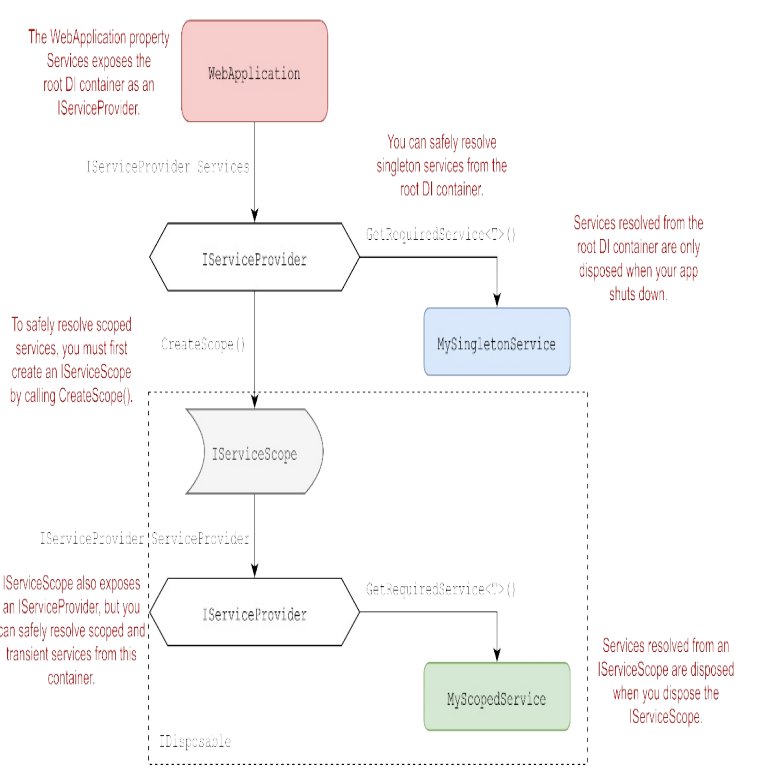